# Explore here

In [13]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
# print(client_id)
client_secret = os.environ.get('CLIENT_SECRET')
# print(client_secret)

# 1) Connect to the database here using the SQLAlchemy's create_engine function

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
print(spotify)

# 2) Execute the SQL sentences to create your tables using the SQLAlchemy's execute function

# 3) Execute the SQL sentences to insert your data using the SQLAlchemy's execute function

# 4) Use pandas to print one of the tables as dataframes using read_sql function

In [58]:
poolkids_uri = 'spotify:artist:6yoW6SfviQ5D4Wa5jGxh7f'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
results = spotify.artist_top_tracks(poolkids_uri)

# dictionary = {'track_names': data['track_names'], 'popularity': data['popularity'], 'duration_ms': data['duration_ms']}

rows=[]
track_names = []
popularity_=[]
duration_= []

all_tracks = results['tracks']
print(all_tracks)

for data in all_tracks:
    dictionary = {'song_name': data['name'], 'popularity': data['popularity'], 'duration_ms': data['duration_ms']}
    rows.append(dictionary)

print("Rows")
print(rows) 

#for track in results['tracks'][:10]:

    
   # print('track    : ' + track['name'])
   # track_names.append(track['name'])
    #print('type    : ' + track['type'])
   # print('album    : ' + track['album'])
   # print('audio    : ' + track['preview_url'])
   # print('cover art: ' + track['album']['images'][0]['url'])
    #print(f"Popularity: {track['popularity']}")
   # popularity_.append(track['popularity'])
   # print(f"Duration_ms: {track['duration_ms']}")
   # duration_.append(track['duration_ms'])
    #print()

#print(track_names)
#print(popularity_list)
#print(duration_)

[{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6yoW6SfviQ5D4Wa5jGxh7f'}, 'href': 'https://api.spotify.com/v1/artists/6yoW6SfviQ5D4Wa5jGxh7f', 'id': '6yoW6SfviQ5D4Wa5jGxh7f', 'name': 'Pool Kids', 'type': 'artist', 'uri': 'spotify:artist:6yoW6SfviQ5D4Wa5jGxh7f'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/5WKGQhrvySygwE72Ny9nMb'}, 'href': 'https://api.spotify.com/v1/albums/5WKGQhrvySygwE72Ny9nMb', 'id': '5WKGQhrvySygwE72Ny9nMb', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b27347ed88593a1aef0e6f877a2b', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e0247ed88593a1aef0e6f877a2b', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d0000485147ed88593a1aef0e6f877a2b', 'width': 64}], 'is_playable': True, 'name': 'Pool Kids', 'release_date': '2022-07-22', 'release_date_precision': 'day', 'total_tracks': 12, 'type': 'album', 'uri': 'spotify:a

In [60]:
import pandas as pd

df = pd.DataFrame(rows)
df

,song_name,popularity,duration_ms
0,"That's Physics, Baby",42,234323
1,$5 Subtweet,40,142262
2,Conscious Uncoupling,39,209679
3,Arm's Length,37,258812
4,I Hope You're Right,36,198135
5,Almost Always Better (Almost Always Worse),33,203017
6,Talk Too Much,33,276151
7,Further,33,201860
8,No Stranger,32,224373
9,Swallow,32,217166


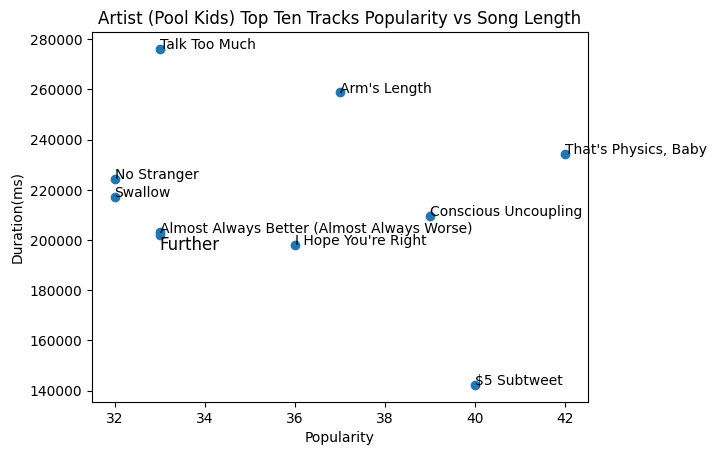

In [128]:
import matplotlib.pyplot as plt

plt.scatter(df.popularity, df.duration_ms)
plt.title("Artist (Pool Kids) Top Ten Tracks Popularity vs Song Length")
plt.xlabel("Popularity")
plt.ylabel("Duration(ms)")

# Label points in one line
for i, song_name in enumerate(df.song_name):
    if song_name == "Further":
        plt.text(df.popularity[i], df.duration_ms[i], song_name, fontsize=12, va='top', ha='left')
    else: 
        plt.text(df.popularity[i], df.duration_ms[i], song_name, fontsize=10)
# plt.tight_layout()
plt.show()

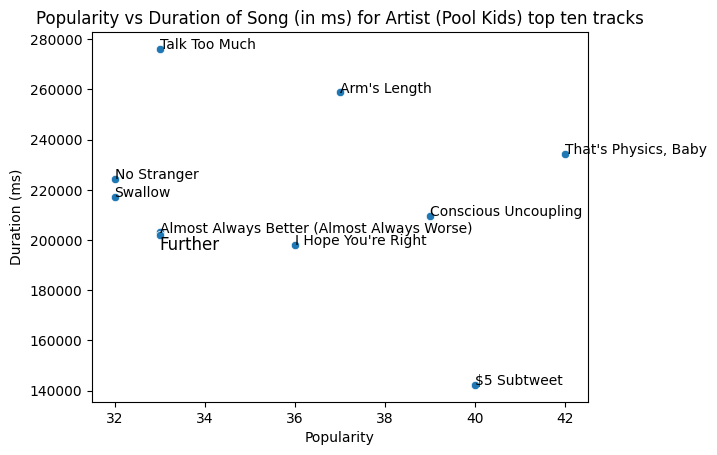

In [121]:
import seaborn as sns

sns.scatterplot(data = df, x = 'popularity', y = 'duration_ms', legend='auto')
plt.title("Popularity vs Duration of Song (in ms) for Artist (Pool Kids) top ten tracks")
plt.xlabel("Popularity")
plt.ylabel("Duration (ms)")
# Label points in one line
for i, song_name in enumerate(df.song_name):
    if song_name == "Further":
        plt.text(df.popularity[i], df.duration_ms[i], song_name, fontsize=12, va='top', ha='left')
    else: 
        plt.text(df.popularity[i], df.duration_ms[i], song_name, fontsize=10)
    



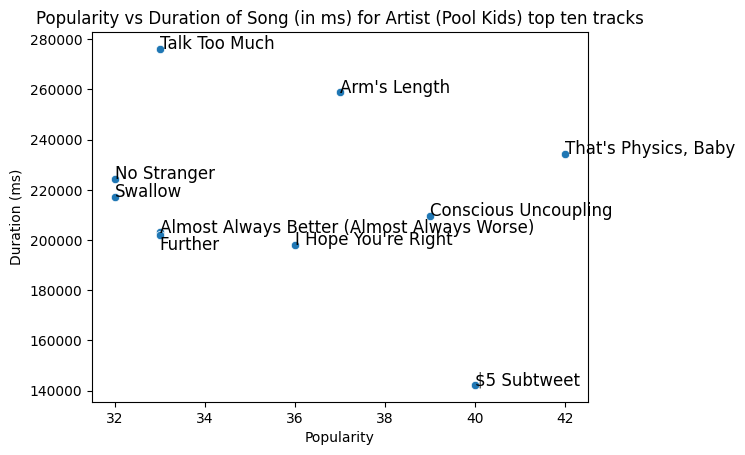

In [137]:
import seaborn as sns

sns.scatterplot(data = df, x = 'popularity', y = 'duration_ms', legend='auto')
plt.title("Popularity vs Duration of Song (in ms) for Artist (Pool Kids) top ten tracks")
plt.xlabel("Popularity")
plt.ylabel("Duration (ms)")



# Label points in one line using annotate
for i, song_name in enumerate(df.song_name):
    if song_name == "Further":
       plt.annotate(song_name, (df.popularity[i], df.duration_ms[i]), fontsize=12, va='top', ha='left')
    else: 
        plt.annotate(song_name, (df.popularity[i], df.duration_ms[i]), fontsize=12)
    

